In [2]:
pip install pillow matplotlib


Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt


In [1]:
pip install os

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


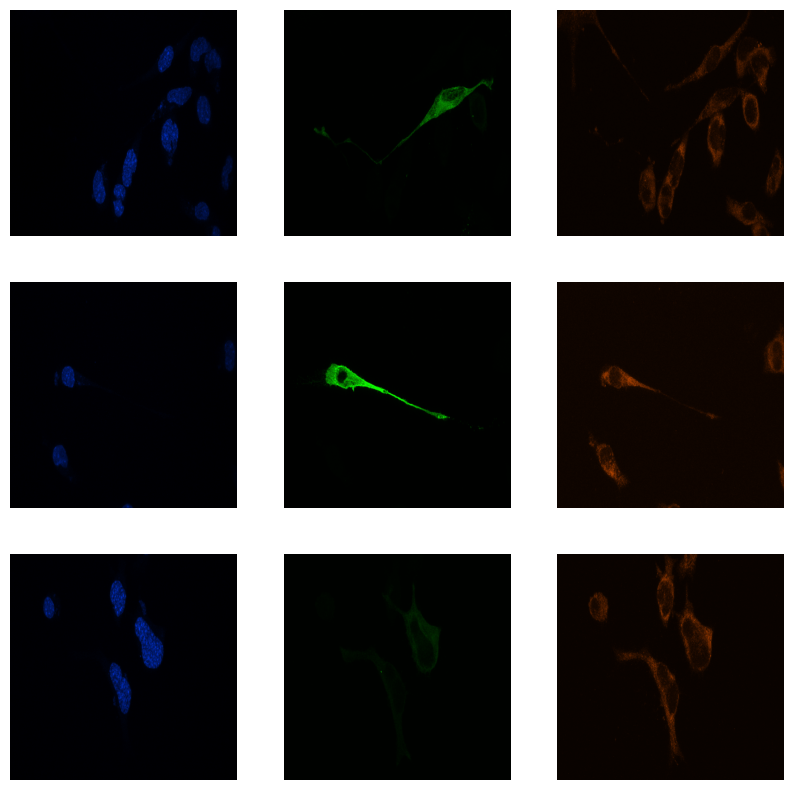

In [4]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog

# Function to resize images with higher quality
def resize_images(images_dir, output_size=(600, 600)):
    resized_images = []
    for filename in os.listdir(images_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(images_dir, filename)
            img = Image.open(img_path)
            img_resized = img.resize(output_size, Image.BICUBIC)  # Use bicubic for better quality
            resized_images.append(img_resized)
    return resized_images

# Function to plot images in a grid with no more than 3 columns
def plot_images(images, num_cols=3):
    num_images = len(images)
    num_rows = (num_images - 1) // num_cols + 1
    plt.figure(figsize=(10, 10))
    for i, img in enumerate(images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Function to ask user for directory
def ask_directory():
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    directory = filedialog.askdirectory(title="Select Directory Containing Images")
    return directory

# Main function
def main():
    images_dir = ask_directory()
    if images_dir:
        resized_images = resize_images(images_dir)
        plot_images(resized_images)

if __name__ == "__main__":
    main()


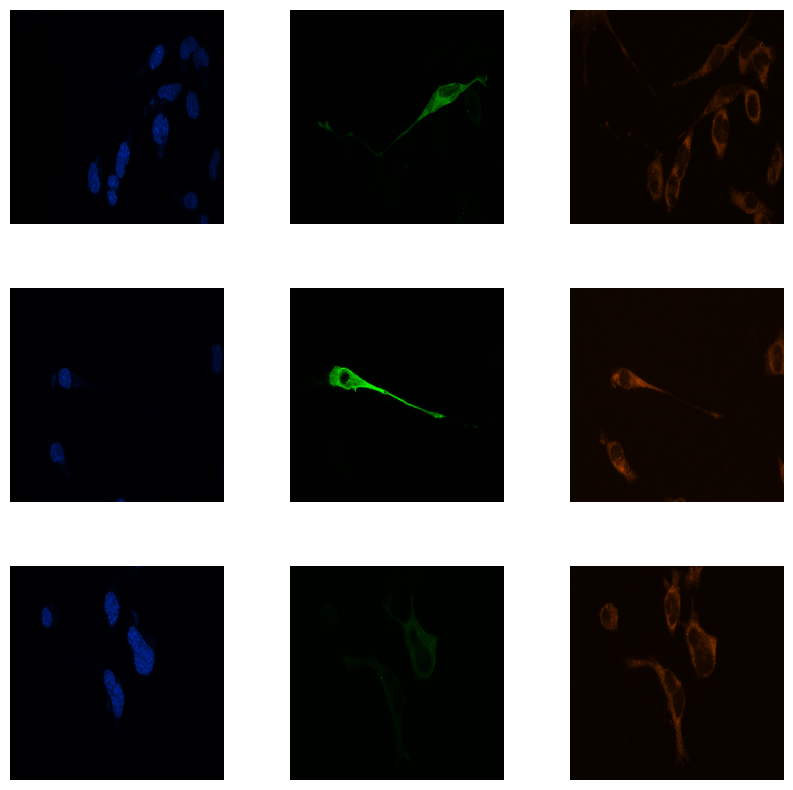

In [6]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import math

# Function to resize images with higher quality
def resize_images(images_dir, output_size=(600, 600)):
    resized_images = []
    for filename in os.listdir(images_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(images_dir, filename)
            img = Image.open(img_path)
            img_resized = img.resize(output_size, Image.BICUBIC)  # Use bicubic for better quality
            resized_images.append(img_resized)
    return resized_images

# Function to plot images in a grid while maintaining aspect ratio
def plot_images(images, num_cols=3):
    num_images = len(images)
    num_rows = math.ceil(num_images / num_cols)
    
    # Calculate figure size based on the number of columns
    fig_width = 10
    fig_height = fig_width / num_cols * num_rows
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axs.flat):
        if i < num_images:
            img = images[i]
            ax.imshow(img)
            ax.axis('off')
        else:
            ax.axis('off')  # Hide the subplot if there are fewer images than subplots
    
    plt.show()

# Function to ask user for directory
def ask_directory():
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    directory = filedialog.askdirectory(title="Select Directory Containing Images")
    return directory

# Main function
def main():
    images_dir = ask_directory()
    if images_dir:
        resized_images = resize_images(images_dir)
        plot_images(resized_images)

if __name__ == "__main__":
    main()



width: 2048
height: 1024
rectangle
resizing to rectangle
width: 2048
height: 1024
rectangle
resizing to rectangle
width: 2048
height: 1024
rectangle
resizing to rectangle
width: 2048
height: 1024
rectangle
resizing to rectangle
width: 2048
height: 1024
rectangle
resizing to rectangle
width: 2048
height: 1024
rectangle
resizing to rectangle
width: 2048
height: 1024
rectangle
resizing to rectangle
width: 2048
height: 1024
rectangle
resizing to rectangle
width: 2048
height: 1024
rectangle
resizing to rectangle


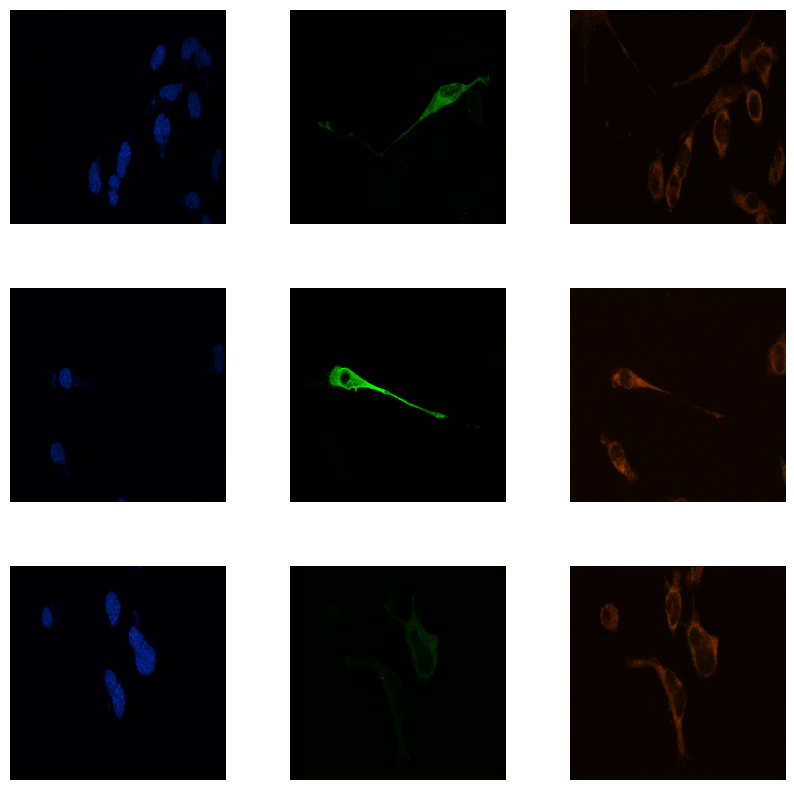

In [13]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import math

# Function to resize images to 600x600
def resize_function_square(image):
    print('resizing to square')
    return image.resize((600, 600), Image.BICUBIC)

# Function to resize images to 300x600
def resize_function_rectangle(image):
    print('resizing to rectangle')
    return image.resize((600, 300), Image.BICUBIC)

# Function to resize images based on their aspect ratio
def resize_images(images_dir):
    resized_images = []
    for filename in os.listdir(images_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(images_dir, filename)
            img = Image.open(img_path)
            print("width: " + str(img.width))
            print("height: " + str(img.height))
            if img.width == img.height:
                print('square')
                resized_img = resize_function_square(img)
            else:
                print('rectangle')
                resized_img = resize_function_rectangle(img)
            resized_images.append(resized_img)
    return resized_images

# Function to plot images in a grid while maintaining aspect ratio
def plot_images(images, num_cols=3):
    num_images = len(images)
    num_rows = math.ceil(num_images / num_cols)
    
    # Calculate figure size based on the number of columns
    fig_width = 10
    fig_height = fig_width / num_cols * num_rows
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axs.flat):
        if i < num_images:
            img = images[i]
            ax.imshow(img)
            ax.axis('off')
            ax.set_aspect('auto')  # Ensure that each subplot maintains the aspect ratio of the image
        else:
            ax.axis('off')  # Hide the subplot if there are fewer images than subplots
    
    plt.show()

# Function to ask user for directory
def ask_directory():
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    directory = filedialog.askdirectory(title="Select Directory Containing Images")
    return directory

# Main function
def main():
    images_dir = ask_directory()
    if images_dir:
        resized_images = resize_images(images_dir)
        plot_images(resized_images)

if __name__ == "__main__":
    main()


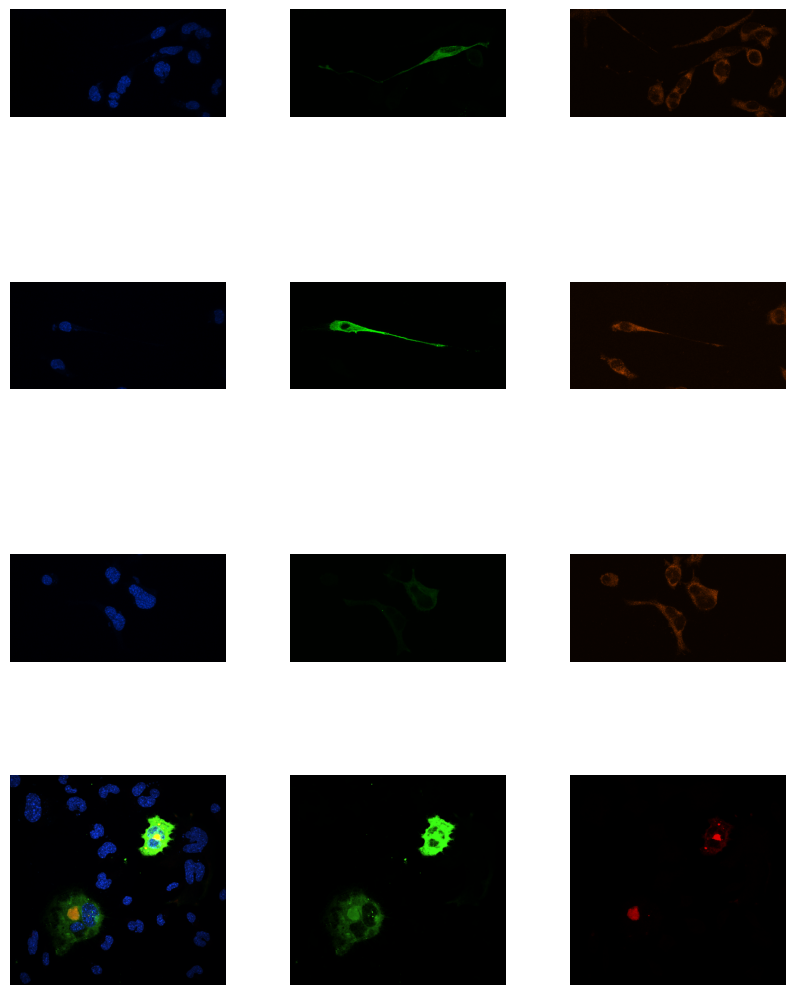

In [20]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import math

# Function to resize images to 600x600
def resize_function_square(image):
    return image.resize((600, 600), Image.BICUBIC)

# Function to resize images to 300x600
def resize_function_rectangle(image):
    return image.resize((600, 300), Image.BICUBIC)

# Function to resize images based on their aspect ratio
def resize_images(images_dir):
    resized_images = []
    resize_functions = []  # Keep track of which resize function was used for each image
    for filename in os.listdir(images_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(images_dir, filename)
            img = Image.open(img_path)
            if img.width == img.height:
                resized_img = resize_function_square(img)
                resize_functions.append("square")
            else:
                resized_img = resize_function_rectangle(img)
                resize_functions.append("rectangle")
            resized_images.append(resized_img)
    return resized_images, resize_functions


# Main function
def main():
    images_dir = ask_directory()
    if images_dir:
        resized_images, resize_functions = resize_images(images_dir)
        plot_images(resized_images, resize_functions, images_dir)

# Function to plot images in a grid while maintaining aspect ratio
def plot_images(images, resize_functions, images_dir, num_cols=3):

    num_images = len(images)
    num_rows = math.ceil(num_images / num_cols)
    
    # Calculate figure size based on the number of columns
    fig_width = 10
    fig_height = fig_width / num_cols * num_rows
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axs.flat):
        if i < num_images:
            img = images[i]
            resize_function = resize_functions[i]
            ax.imshow(img)
            ax.axis('off')
            if resize_function == "square":
                ax.set_aspect('auto')  # Set aspect ratio to 'auto' for square images
        else:
            ax.axis('off')  # Hide the subplot if there are fewer images than subplots
    save_path = os.path.join(images_dir, "grid_image.png")
    plt.savefig(save_path)

# Function to ask user for directory
def ask_directory():
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    directory = filedialog.askdirectory(title="Select Directory Containing Images")
    return directory

if __name__ == "__main__":
    main()
